# Visualization

- http://scitools.org.uk/cartopy/docs/latest/index.html#getting-started
- https://github.com/nawendt/cartopy-tutorial/blob/master/cartopy-tutorial.ipynb

In [2]:
import cartopy.crs as ccrs
from cartopy import feature
import matplotlib.pyplot as plt
from matplotlib import cm

import time, os, math
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

import paths
from TRMM import TRMM

# force autoreload of external modules on save
%load_ext autoreload
%autoreload 
%matplotlib inline

## Tutorial

In [10]:
# load the numpy save file with example data

ruc = np.load('00_DATA/ruc2anl_130_20120414_2100_000.npz')
lat = ruc['LAT']
lon = ruc['LON']
tsfc = ruc['TSFC']

ruc['TSFC'].shape

(337, 451)

In [4]:
# define a projection with its parameters

lccProjParams = {
    'central_latitude'   : 25.0, # same as lat_0 in proj4 string 
    'central_longitude'  : 265.0, # same as lon_0
    'standard_parallels' : (25.0, 25.0) # same as (lat_1, lat_2)
}

proj = ccrs.LambertConformal(**lccProjParams)

NameError: name 'lon' is not defined

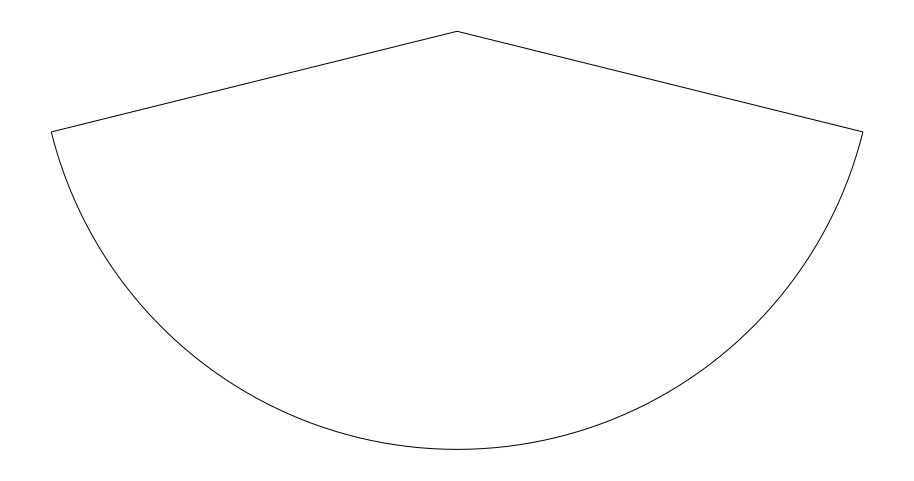

In [5]:
# create a new matplotlib plot and pass in the projection
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection = proj)

# add the surface temperature data as a colored overlay
cbax = ax.pcolormesh(lon, lat, tsfc, 
                     transform = ccrs.PlateCarree(),
                     cmap = cm.gist_ncar)

# draw the gridlines as specified in the projection
ax.gridlines()

# enhance coastlines (downloads something from natural earth)
ax.coastlines('50m')

## TRMM

In [5]:
# load data for the pre-monsoon period (MAM)

df_pre_monsoon = TRMM.load_dataset(range(1998, 2017), [3, 4, 5])

> Finished: 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 

In [45]:
# extract the first timestamp to get a single data column
# reset the indices to get them as columns

single_timestamp = df_pre_monsoon.iloc[:,0:1]
single_timestamp.reset_index(inplace=True)
single_timestamp.head()

,lat,lon,888710400
0,5.125,62.375,0.0
1,5.125,62.625,0.0
2,5.125,62.875,0.0
3,5.125,63.125,0.0
4,5.125,63.375,0.0


TypeError: Dimensions of C (19600, 3) are incompatible with X (19600) and/or Y (19600); see help(pcolormesh)

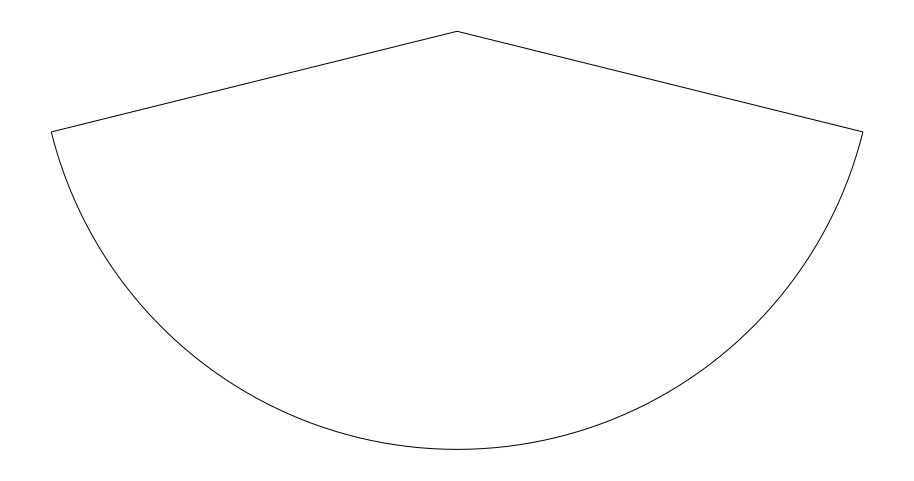